In [ ]:
pip install statsmodels

In [ ]:
import pandas as pd
import datetime
from datetime import date, time
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels.api as sm
import warnings

In [ ]:
df = pd.read_csv('Superstore-Copy1.csv')
df

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,Product Name,Profit,Quantity,Region,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category
0,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Bush,Bush Somerset Collection Bookcase,41.9136,2,South,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases
1,Furniture,Henderson,United States,Claire Gute,0.00,1,11/8/2017,CA-2017-152156,42420.0,Hon,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",219.5820,3,South,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,6/12/2017,CA-2017-138688,90036.0,Universal,Self-Adhesive Address Labels for Typewriters b...,6.8714,2,West,14.6200,Corporate,6/16/2017,Second Class,California,Labels
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,10/11/2016,US-2016-108966,33311.0,Bretford,Bretford CR4500 Series Slim Rectangular Table,-383.0310,5,South,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,10/11/2016,US-2016-108966,33311.0,Eldon,Eldon Fold 'N Roll Cart System,2.5164,2,South,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,12/24/2015,US-2015-138247,90045.0,Other,Seidio BD2-HK3IPH5-BK DILEX Case and Holster C...,17.3656,7,West,173.6560,Home Office,12/29/2015,Standard Class,California,Phones
9990,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,7/12/2015,CA-2015-110184,90036.0,GE,GE DSL Phone Line Filter,28.7928,8,West,255.9360,Home Office,7/16/2015,Standard Class,California,Phones
9991,Technology,Santa Barbara,United States,Maria Etezadi,0.20,1,6/6/2017,CA-2017-160717,93101.0,Samsung,Samsung Galaxy Mega 6.3,226.7946,9,West,3023.9280,Home Office,6/11/2017,Standard Class,California,Phones
9992,Technology,Yuma,United States,Gary Hansen,0.70,1,10/16/2018,CA-2018-159282,85364.0,Other,Swingline SM12-08 MicroCut Jam Free Shredder,-479.9880,5,West,599.9850,Home Office,10/21/2018,Standard Class,Arizona,Machines


In [ ]:
df.dtypes

,0
Category,object
City,object
Country,object
Customer Name,object
Discount,float64
Number of Records,int64
Order Date,object
Order ID,object
Postal Code,float64
Manufacturer,object


In [ ]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.dtypes

,0
Category,object
City,object
Country,object
Customer Name,object
Discount,float64
Number of Records,int64
Order Date,datetime64[ns]
Order ID,object
Postal Code,float64
Manufacturer,object


In [ ]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.to_period('M')
df['month_name'] = df['Order Date'].dt.month_name()
df['quarter'] = df['Order Date'].dt.to_period('Q')
df

,Category,City,Country,Customer Name,Discount,Number of Records,Order Date,Order ID,Postal Code,Manufacturer,...,Sales,Segment,Ship Date,Ship Mode,State,Sub-Category,year,month,month_name,quarter
0,Furniture,Henderson,United States,Claire Gute,0.00,1,2017-11-08,CA-2017-152156,42420.0,Bush,...,261.9600,Consumer,11/11/2017,Second Class,Kentucky,Bookcases,2017,2017-11,November,2017Q4
1,Furniture,Henderson,United States,Claire Gute,0.00,1,2017-11-08,CA-2017-152156,42420.0,Hon,...,731.9400,Consumer,11/11/2017,Second Class,Kentucky,Chairs,2017,2017-11,November,2017Q4
2,Office Supplies,Los Angeles,United States,Darrin Van Huff,0.00,1,2017-06-12,CA-2017-138688,90036.0,Universal,...,14.6200,Corporate,6/16/2017,Second Class,California,Labels,2017,2017-06,June,2017Q2
3,Furniture,Fort Lauderdale,United States,Sean O'Donnell,0.45,1,2016-10-11,US-2016-108966,33311.0,Bretford,...,957.5775,Consumer,10/18/2016,Standard Class,Florida,Tables,2016,2016-10,October,2016Q4
4,Office Supplies,Fort Lauderdale,United States,Sean O'Donnell,0.20,1,2016-10-11,US-2016-108966,33311.0,Eldon,...,22.3680,Consumer,10/18/2016,Standard Class,Florida,Storage,2016,2016-10,October,2016Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,2015-12-24,US-2015-138247,90045.0,Other,...,173.6560,Home Office,12/29/2015,Standard Class,California,Phones,2015,2015-12,December,2015Q4
9990,Technology,Los Angeles,United States,Ben Ferrer,0.20,1,2015-07-12,CA-2015-110184,90036.0,GE,...,255.9360,Home Office,7/16/2015,Standard Class,California,Phones,2015,2015-07,July,2015Q3
9991,Technology,Santa Barbara,United States,Maria Etezadi,0.20,1,2017-06-06,CA-2017-160717,93101.0,Samsung,...,3023.9280,Home Office,6/11/2017,Standard Class,California,Phones,2017,2017-06,June,2017Q2
9992,Technology,Yuma,United States,Gary Hansen,0.70,1,2018-10-16,CA-2018-159282,85364.0,Other,...,599.9850,Home Office,10/21/2018,Standard Class,Arizona,Machines,2018,2018-10,October,2018Q4


# YEAR - LINEAR MODELL (LINEAR REGRESSION)

In [ ]:
sales_per_year = df.groupby('year')['Quantity'].sum().reset_index()
sales_per_year

,year,Quantity
0,2015,7581
1,2016,7979
2,2017,9837
3,2018,12476


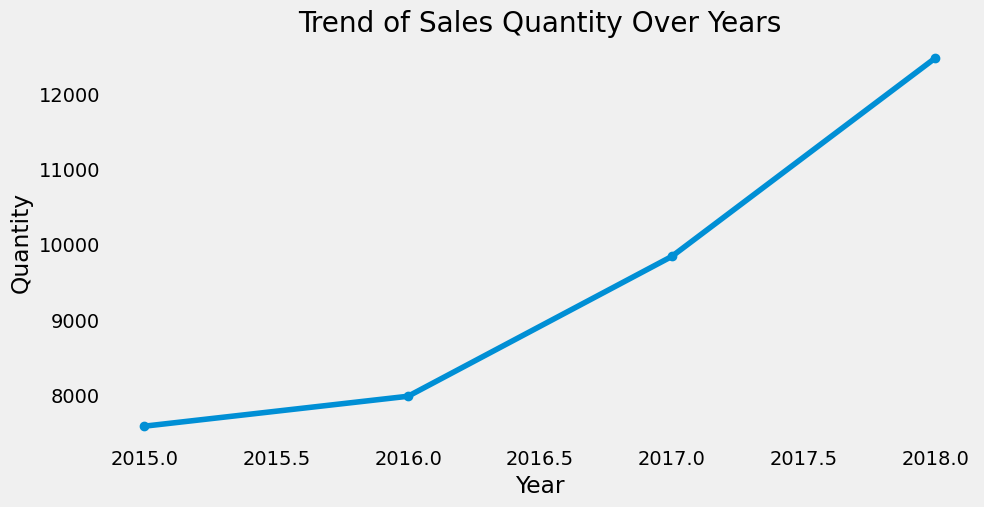

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year['year'], sales_per_year['Quantity'], marker='o')
plt.title('Trend of Sales Quantity Over Years')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.grid()
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

x = sales_per_year['year'].values.reshape(-1,1)
y = sales_per_year['Quantity'].values

model = LinearRegression()
model.fit(x,y)

sales_per_year['Trend'] = model.predict(x)

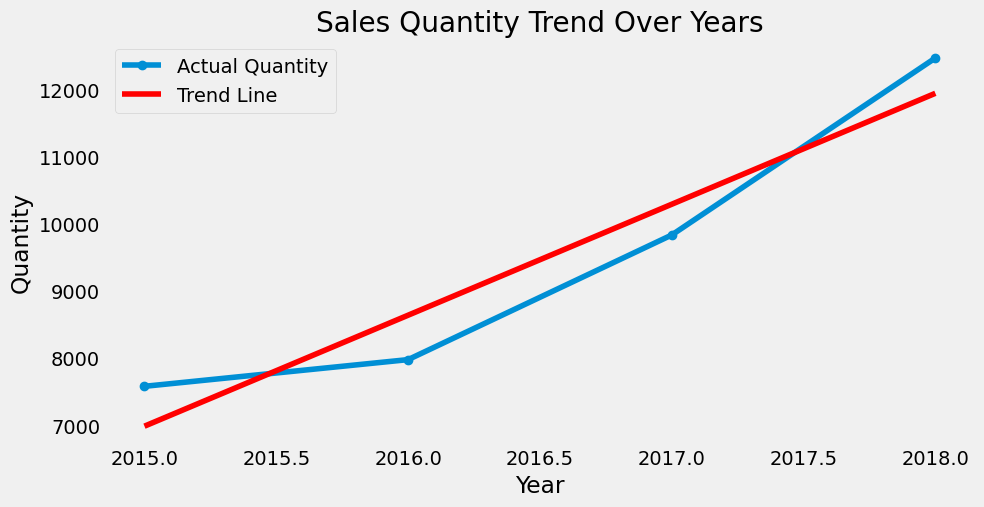

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year['year'], sales_per_year['Quantity'], marker='o', label='Actual Quantity')
plt.plot(sales_per_year['year'], sales_per_year['Trend'], color='red', label='Trend Line')
plt.title('Sales Quantity Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

In [ ]:
r_squared = model.score(x, y)
print(f'R-squared: {r_squared:.2f}')

R-squared: 0.91


In [ ]:
# Prediksi untuk tahun 2019 dan 2020
future_years = np.array([[2019], [2020]])
future_predictions = model.predict(future_years)

# Menampilkan hasil prediksi
for year, prediction in zip(future_years.flatten(), future_predictions):
    print(f'Predicted Quantity for {year}: {prediction:.2f}')

Predicted Quantity for 2019: 13604.00
Predicted Quantity for 2020: 15258.30


In [ ]:
# Gabungkan data historis dan prediksi
forecast_years = np.concatenate((sales_per_year['year'].values, future_years.flatten()))
forecast_quantities = np.concatenate((sales_per_year['Quantity'].values, future_predictions))

forecast_df = pd.DataFrame({'Year': forecast_years, 'Quantity': forecast_quantities})
forecast_df


,Year,Quantity
0,2015,7581.0
1,2016,7979.0
2,2017,9837.0
3,2018,12476.0
4,2019,13604.0
5,2020,15258.3


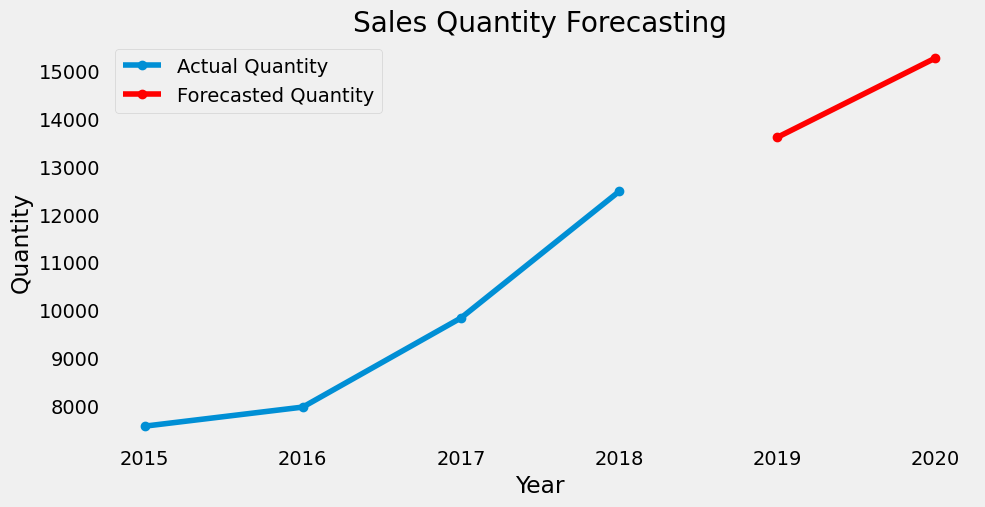

In [ ]:
# Visualisasi hasil forecasting
plt.figure(figsize=(10, 5))
plt.plot(sales_per_year['year'], sales_per_year['Quantity'], marker='o', label='Actual Quantity')
plt.plot(future_years.flatten(), future_predictions, marker='o', color='red', label='Forecasted Quantity')
plt.title('Sales Quantity Forecasting')
plt.xlabel('Year')
plt.ylabel('Quantity')
plt.xticks(np.arange(2015, 2021))
plt.legend()
plt.grid()
plt.show()

# QUARTER - SARIMA

In [ ]:
sales_per_quarter = df.groupby('quarter')['Quantity'].sum().reset_index()
sales_per_quarter

,quarter,Quantity
0,2015Q1,1028
1,2015Q2,1523
2,2015Q3,2159
3,2015Q4,2871
4,2016Q1,990
5,2016Q2,1604
6,2016Q3,2241
7,2016Q4,3144
8,2017Q1,1243
9,2017Q2,2240


In [ ]:
sales_per_quarter['quarter'] = sales_per_quarter['quarter'].astype(str)
sales_per_quarter.dtypes

,0
quarter,object
Quantity,int64


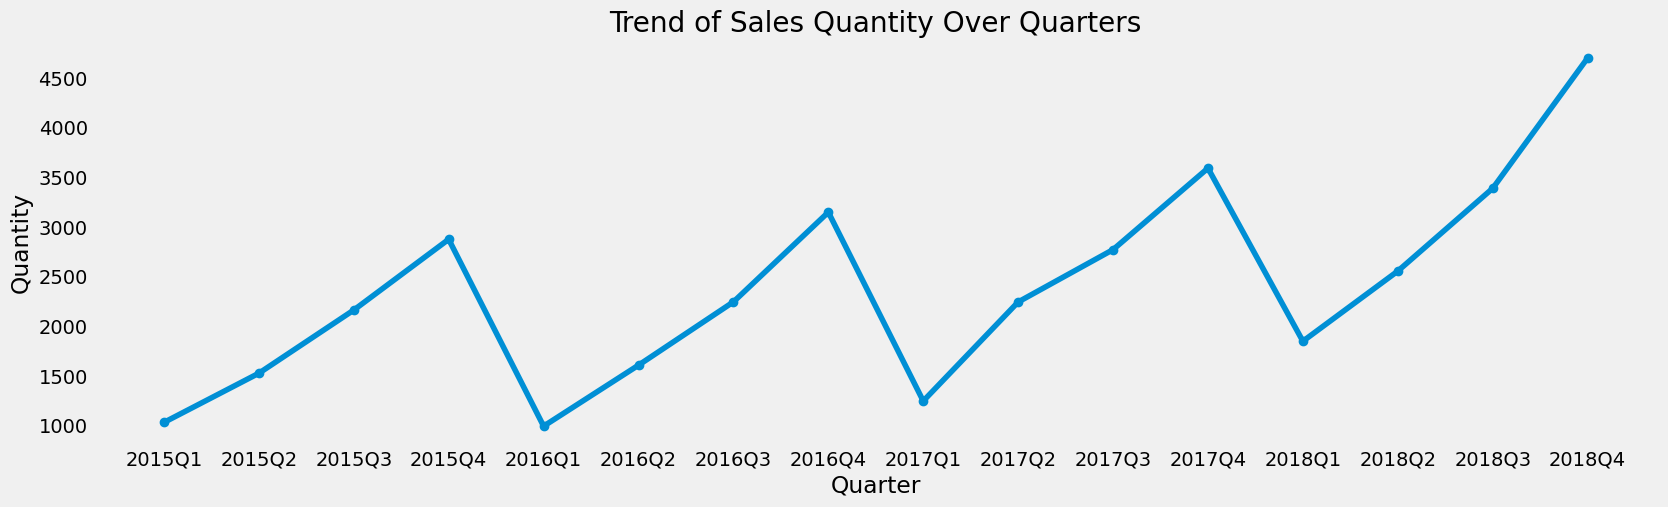

In [ ]:
plt.figure(figsize=(18, 5))
plt.plot(sales_per_quarter['quarter'], sales_per_quarter['Quantity'], marker='o')
plt.title('Trend of Sales Quantity Over Quarters')
plt.xlabel('Quarter')
plt.ylabel('Quantity')
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

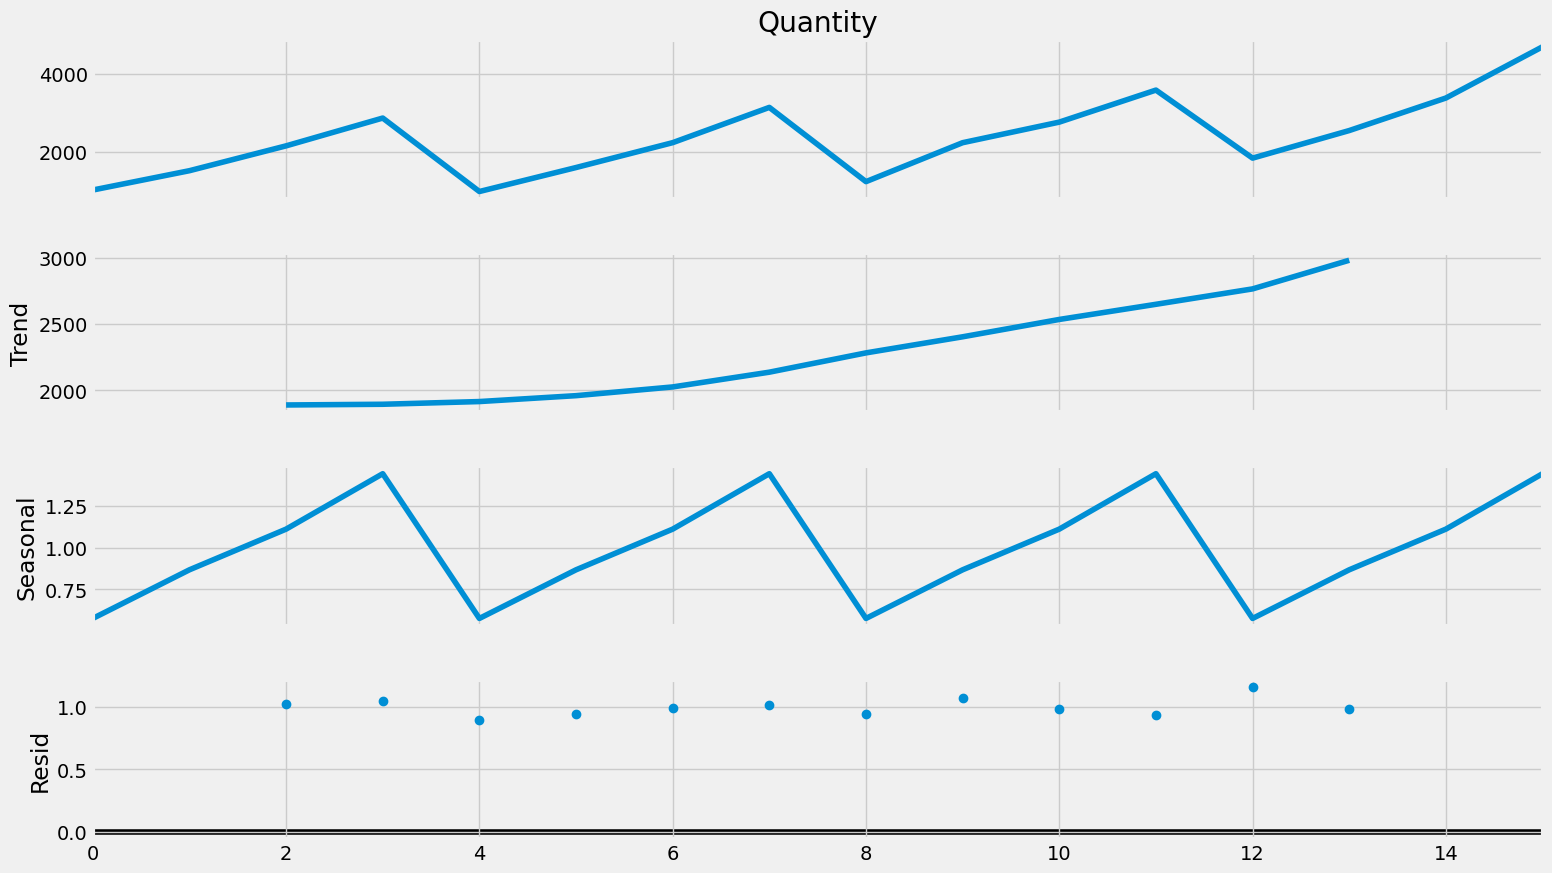

In [ ]:
#mengidentifikasi komponen musiman, tren, dan residual dalam data.
result = seasonal_decompose(sales_per_quarter['Quantity'], model='multiplicative', period=4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 10)

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_per_quarter['Quantity'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

#jika p-value < 0.05, maka Anda dapat menolak hipotesis nol dan menyimpulkan bahwa data adalah stasioner.

ADF Statistic: 3.2291230599486798
p-value: 1.0


In [41]:
sales_diff = sales_per_quarter['Quantity'].diff().dropna()

# Uji kembali stasioneritas setelah differencing
result_diff = adfuller(sales_diff)
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -14.604012630281122
p-value: 4.12246189427721e-27


<Axes: >

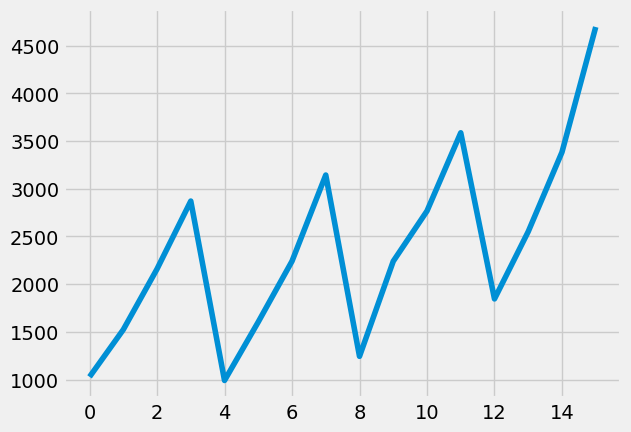

In [44]:
sales_per_quarter['Quantity'].plot()

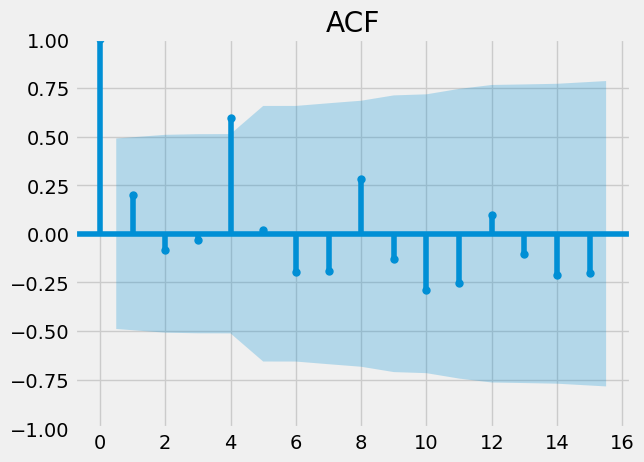

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sales_per_quarter['Quantity'], lags=15)
plt.title('ACF')
plt.show()

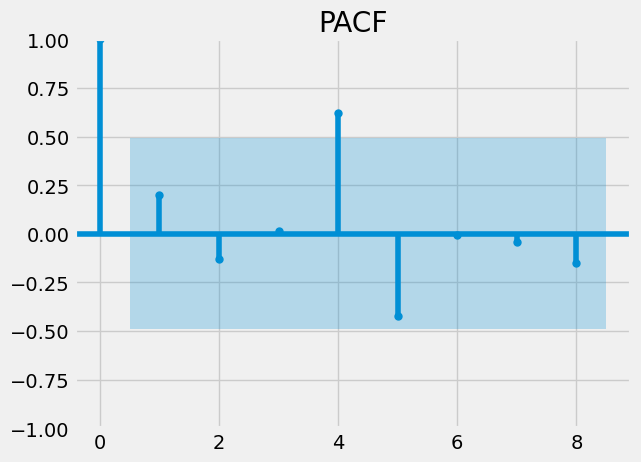

In [46]:
plot_pacf(sales_per_quarter['Quantity'], lags=8)
plt.title('PACF')
plt.show()

In [47]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Membangun model SARIMA
model = SARIMAX(sales_per_quarter['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 4))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                     
Dep. Variable:                          Quantity   No. Observations:                   16
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -75.625
Date:                           Thu, 19 Dec 2024   AIC                            161.250
Time:                                   03:59:35   BIC                            163.239
Sample:                                        0   HQIC                           159.996
                                            - 16                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9988      0.145     -6.903      0.000      -1.282      -0.715
ma.L1          0.9847      0.941      1.046

In [48]:
forecast_steps = 4
forecast = model_fit.forecast(steps=forecast_steps)
print(forecast)

16    2838.229868
17    3700.434453
18    4357.632767
19    5510.324095
Name: predicted_mean, dtype: float64


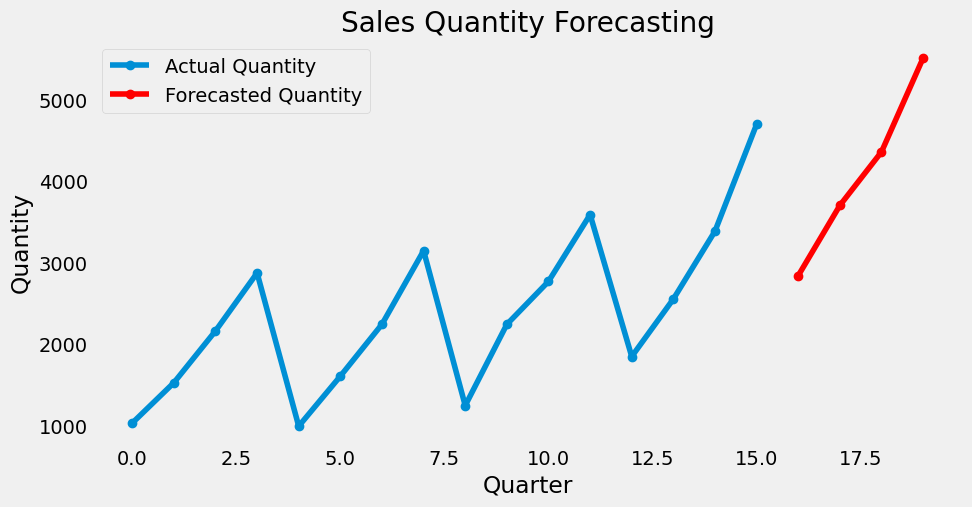

In [49]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_quarter.index, sales_per_quarter['Quantity'], marker='o', label='Actual Quantity')
plt.plot(forecast.index, forecast.values, marker='o', color='red', label='Forecasted Quantity')
plt.title('Sales Quantity Forecasting')
plt.xlabel('Quarter')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()

# MONTH

In [50]:
sales_per_month = df.groupby('month')['Quantity'].sum().reset_index()
sales_per_month

,month,Quantity
0,2015-01,284
1,2015-02,159
2,2015-03,585
3,2015-04,536
4,2015-05,466
5,2015-06,521
6,2015-07,550
7,2015-08,609
8,2015-09,1000
9,2015-10,573


In [65]:
sales_per_month['month'] = sales_per_month['month'].astype(str)
sales_per_month.dtypes

,0
month,object
Quantity,int64
year,int32


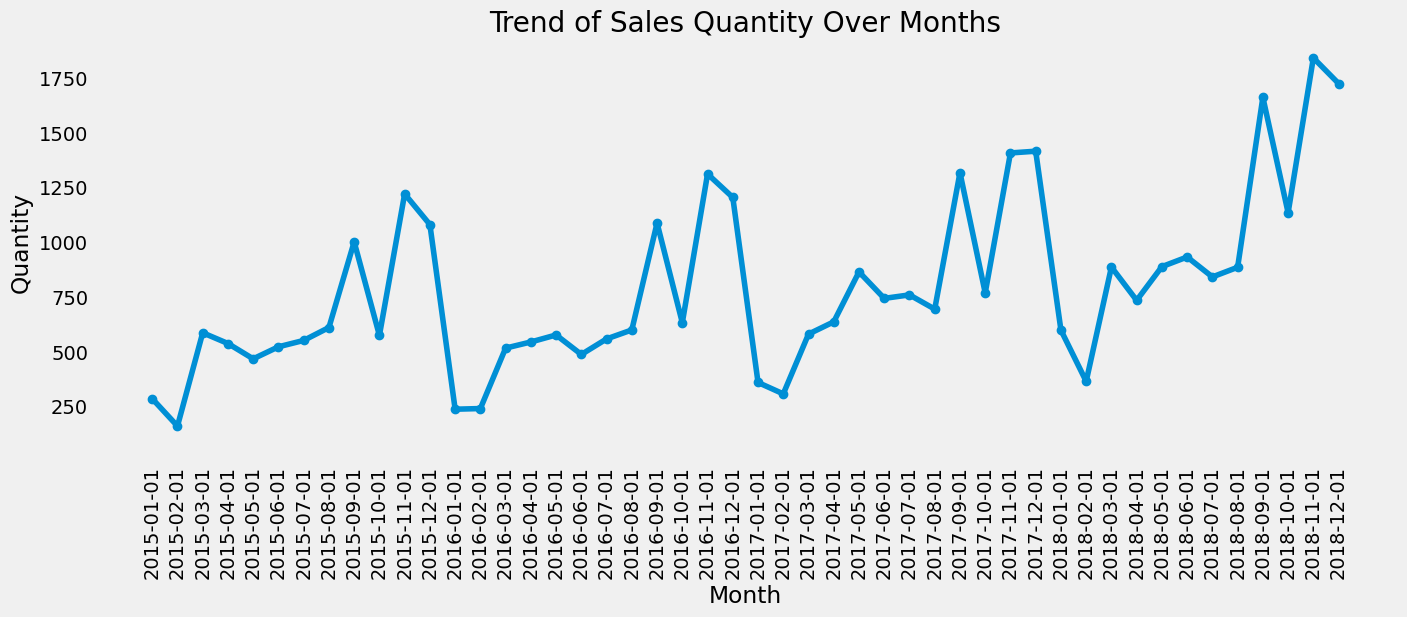

In [69]:
plt.figure(figsize=(15, 5)) # Ukuran figure yang lebih proporsional
plt.plot(sales_per_month['month'], sales_per_month['Quantity'], marker='o')
plt.title('Trend of Sales Quantity Over Months')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.xticks(rotation=90) # Memutar label sumbu x
plt.tick_params(axis='x', which='major', pad=15) # Menambahkan padding pada ticks sumbu x
plt.grid()
plt.show()

<Figure size 640x480 with 0 Axes>

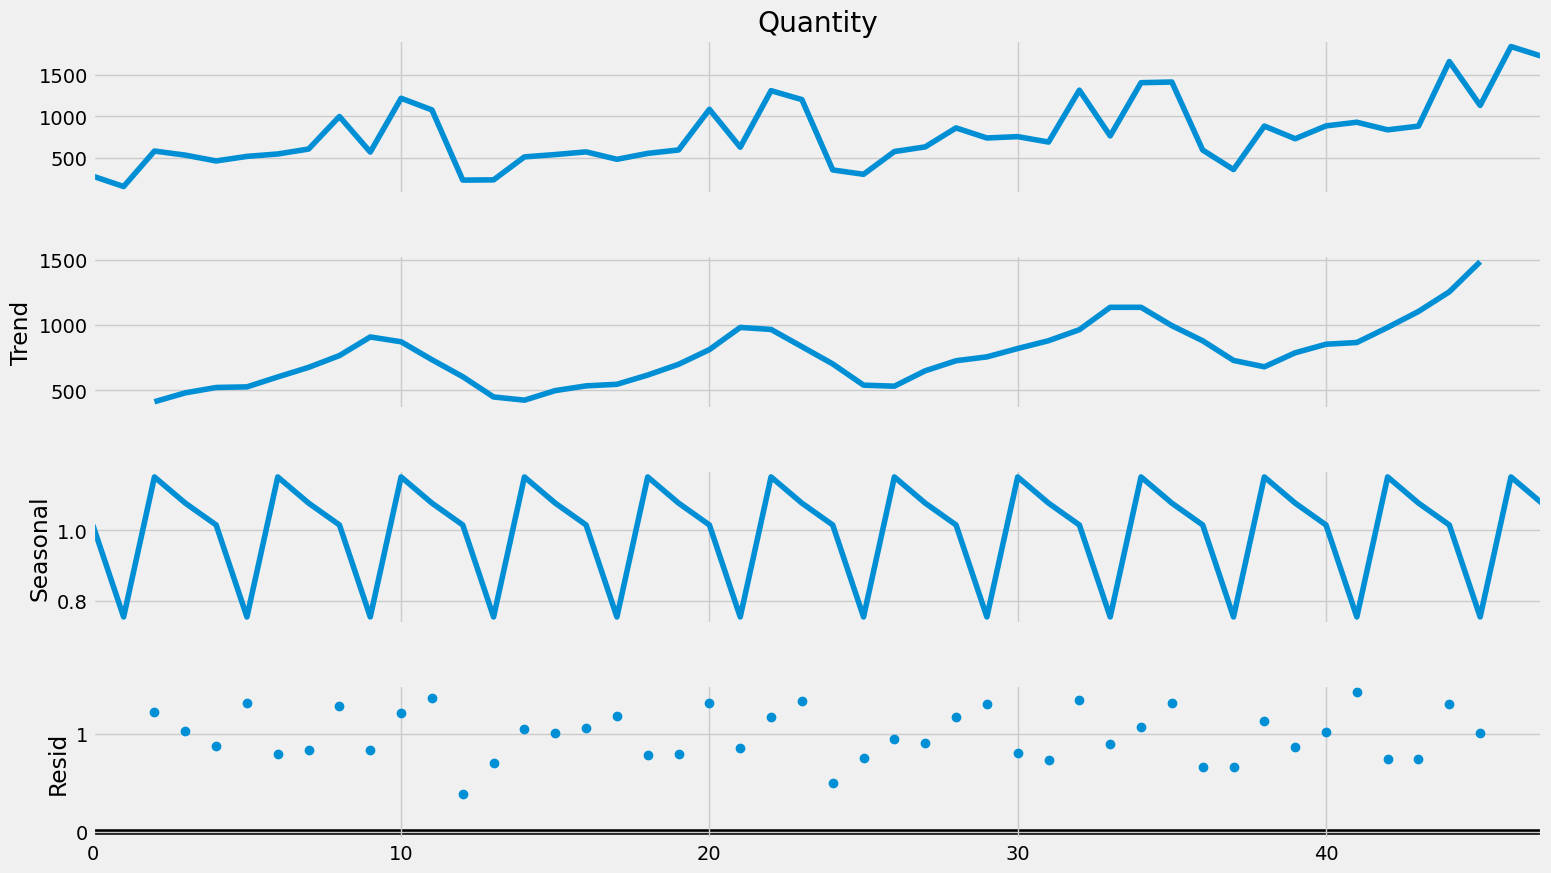

In [71]:
#mengidentifikasi komponen musiman, tren, dan residual dalam data.
result = seasonal_decompose(sales_per_month['Quantity'], model='multiplicative', period=4)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 10)

In [74]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_per_month['Quantity'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

#jika p-value < 0.05, maka dapat menolak hipotesis nol dan menyimpulkan bahwa data adalah stasioner.

ADF Statistic: -3.5510698341407063
p-value: 0.006768390846817892


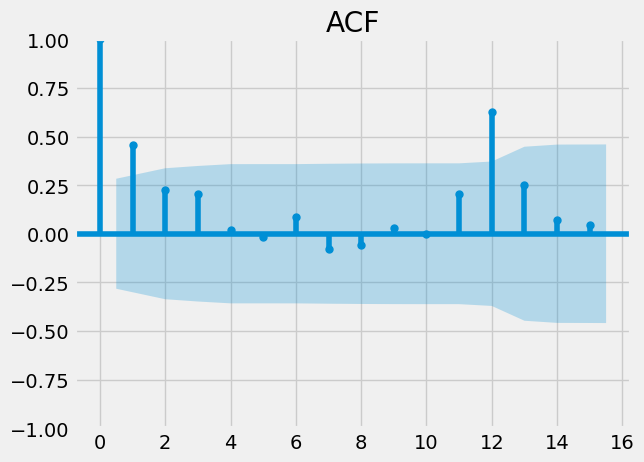

In [75]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sales_per_month['Quantity'], lags=15)
plt.title('ACF')
plt.show()

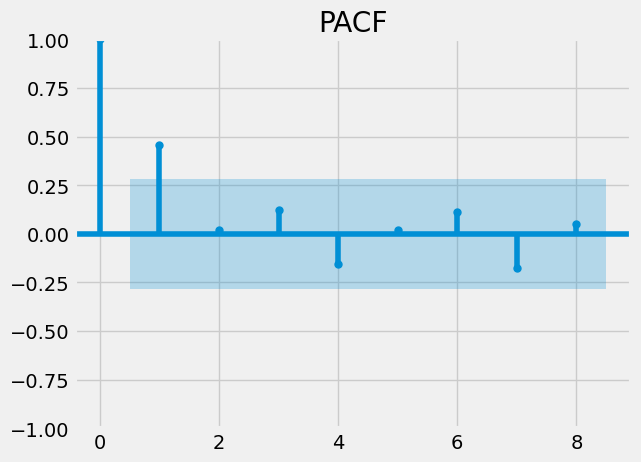

In [76]:
plot_pacf(sales_per_month['Quantity'], lags=8)
plt.title('PACF')
plt.show()

In [77]:
# Membangun model SARIMA
model = SARIMAX(sales_per_month['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

# Menampilkan ringkasan model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                           Quantity   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -208.969
Date:                            Thu, 19 Dec 2024   AIC                            427.937
Time:                                    04:33:56   BIC                            435.714
Sample:                                         0   HQIC                           430.622
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0573      0.351     -0.163      0.870      -0.746       0.631
ma.L1         -0.5159      0.352   

In [78]:
forecast_steps_month = 12
forecast_month = model_fit.forecast(steps=forecast_steps_month)
print(forecast_month)

48     930.107996
49     716.989698
50    1215.708524
51    1084.682981
52    1214.536494
53    1251.768802
54    1180.132365
55    1222.887549
56    1947.257163
57    1432.771589
58    2130.111410
59    2013.459806
Name: predicted_mean, dtype: float64


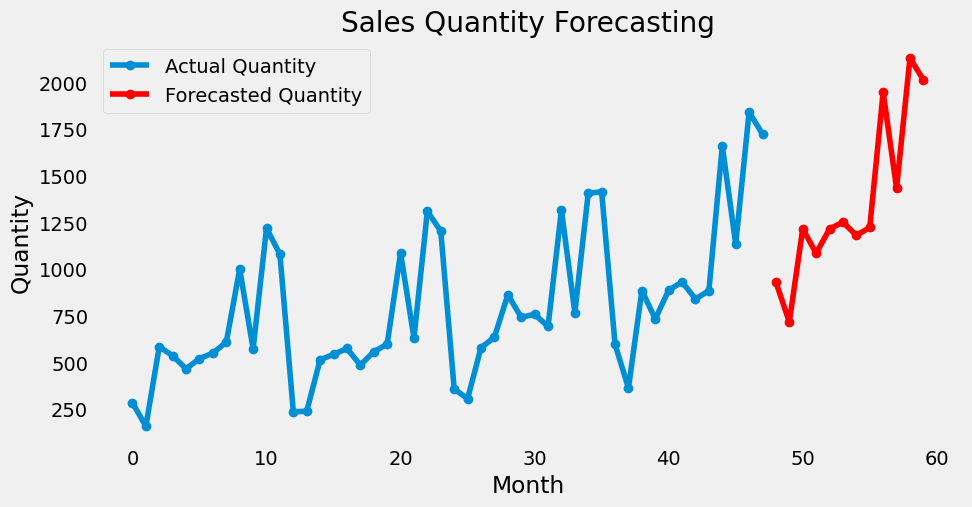

In [79]:
plt.figure(figsize=(10, 5))
plt.plot(sales_per_month.index, sales_per_month['Quantity'], marker='o', label='Actual Quantity')
plt.plot(forecast_month.index, forecast_month.values, marker='o', color='red', label='Forecasted Quantity')
plt.title('Sales Quantity Forecasting')
plt.xlabel('Month')
plt.ylabel('Quantity')
plt.legend()
plt.grid()
plt.show()